<center> <h1>Séries temporelles - TP </h1> </center>

In [1]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
# settings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [4]:
IC = pd.read_csv("ice_cream_vs_heater.csv")

In [6]:
IC

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21
...,...,...,...
193,2020-02,34,45
194,2020-03,25,44
195,2020-04,25,53
196,2020-05,27,70


In [5]:
IC.head(3)

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16


In [7]:
IC.shape

(198, 3)

#  Affichier les colonnes du tableau

In [8]:
IC.columns

Index(['Month', 'heater', 'ice cream'], dtype='object')

# Les types de variables à corriger ? si oui comment?

## Affichier le type des variables

In [9]:
IC.dtypes

Month        object
heater        int64
ice cream     int64
dtype: object

In [10]:
IC.Month = pd.to_datetime(IC.Month)

In [11]:
IC.dtypes

Month        datetime64[ns]
heater                int64
ice cream             int64
dtype: object

In [ ]:
IC.head(3)

,Month,heater,ice cream
0,2004-01-01,27,13
1,2004-02-01,18,15
2,2004-03-01,14,16


# Est-ce qu'il y a des doublons dans les données?

In [12]:
IC.duplicated().sum()

0

# Est-ce qu'il y a des valeurs aberrantes? Si oui comment on peut résoudre le problème?

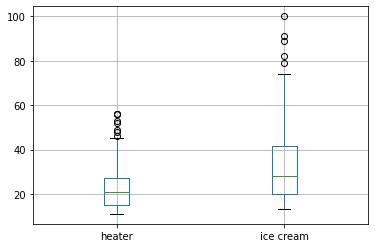

In [13]:
IC.boxplot()

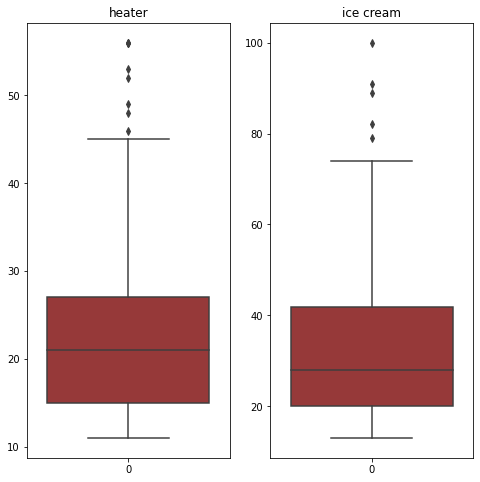

In [14]:
fig = plt.figure(figsize=(8,8))
plt.subplot(121)
sns.boxplot(data=IC["heater"], color='brown')
plt.title("heater")
plt.subplot(122)
sns.boxplot(data=IC["ice cream"], color='brown')
plt.title("ice cream")
plt.show()

In [15]:
IC['heater'].sort_values(ascending = False).head(7)

167    56
168    56
190    56
178    53
155    52
180    49
179    48
Name: heater, dtype: int64

In [16]:
IC['ice cream'].sort_values(ascending = False).head(7)

186    100
174     91
162     89
185     82
173     79
197     74
161     74
Name: ice cream, dtype: int64

In [17]:
IC = IC.loc[(IC.heater<=45)] 
IC = IC.loc[(IC["ice cream"]<=73)] 

In [18]:
IC['ice cream'].sort_values(ascending = False).head(7)

150    71
172    71
196    70
187    68
175    66
184    65
163    64
Name: ice cream, dtype: int64

In [19]:
IC['heater'].sort_values(ascending = False).head(7)

130    45
166    43
192    41
144    40
189    40
156    40
119    39
Name: heater, dtype: int64

# Est-ce qu'il y a des valeurs manquantes? Si oui comment on peut résoudre le problème?

In [20]:
IC.isna().sum()

Month        0
heater       0
ice cream    0
dtype: int64

In [21]:
IC.isnull().sum()

Month        0
heater       0
ice cream    0
dtype: int64

Non, il y a pas de valeurs manquantes

# Tracer la série temporelle 'heater' en fonction du temps 'Month'

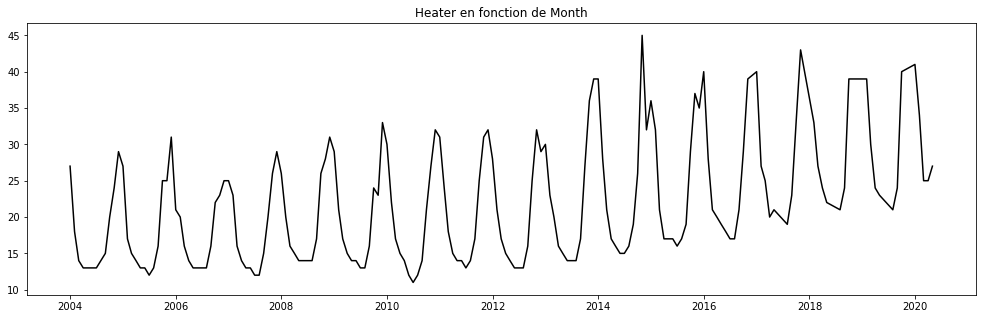

In [22]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(IC.Month, IC.heater,color='black')
plt.title("Heater en fonction de Month")
plt.show()


# Tracer la série temporelle 'Ice cream' en fonction du temps 'Month'

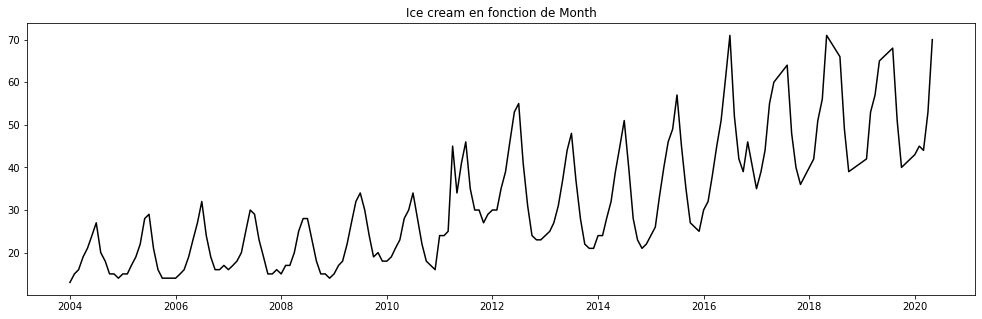

In [23]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(IC.Month, IC['ice cream'],color='black')
plt.title("Ice cream en fonction de Month")
plt.show()



# Verifier la stationnarit& avec le test ADF 
Adf : augmented Dicky Fuller Test

## Recherche du modèle

## heater

### La série est-elle stationnaire?

In [24]:
result = adfuller(IC['heater'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


ADF Statistic: 1.0097026462384375
n_lags: 14
p-value: 0.9943672750979923
Critial Values:
   1%, -3.4698858990744115
Critial Values:
   5%, -2.8789026251889647
Critial Values:
   10%, -2.5760266680839004


### Rendre la série stationnaire

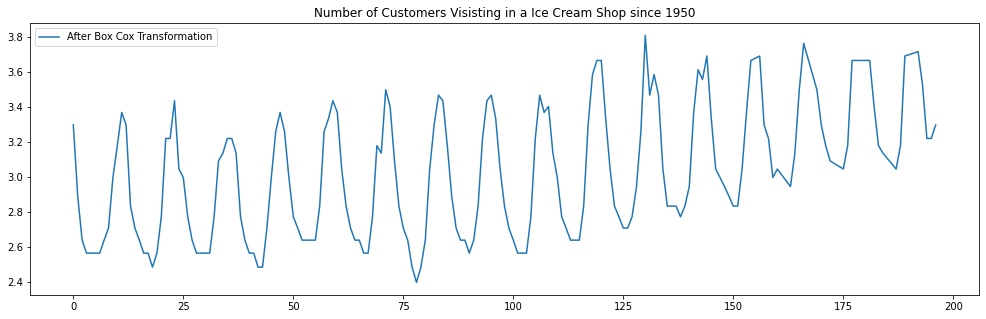

In [25]:
from scipy.stats import boxcox 

ic_boxcox=pd.Series(boxcox(IC['heater'],lmbda=0),index=IC.index)
plt.plot(ic_boxcox, label="After Box Cox Transformation") 
# la nouvelle base c'est data_boxcox qui a rendu le non stationnaire à stationnaire
plt.legend(loc='best')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

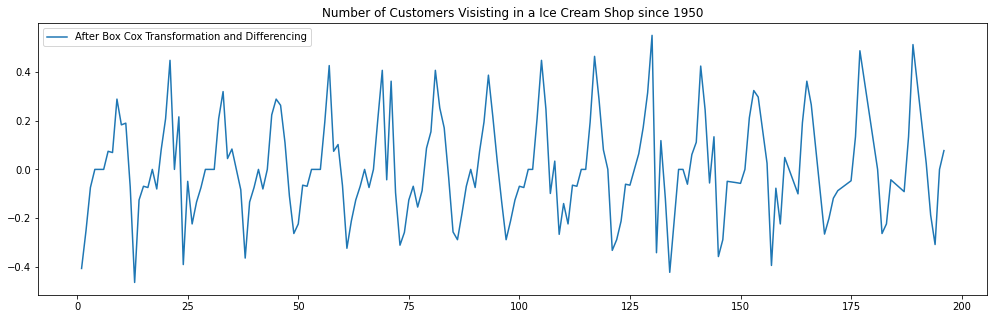

In [26]:
# on a crée cette nouvelle base de serie T , on appliqué le data_boxcox.shift
#pour faire la difference pour supprimer la tendance et la saisonnalité
ic_boxcox_difference= pd.Series(ic_boxcox-ic_boxcox.shift(), index=IC.index)
ic_boxcox_difference.dropna(inplace=True)
plt.plot(ic_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ic_boxcox_difference, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.246943210157404
n_lags: 0.00000000000000152838
p-value: 0.00000000000000152838
Critial Values:
   1%, -3.4698858990744115
Critial Values:
   5%, -2.8789026251889647
Critial Values:
   10%, -2.5760266680839004


### trouver le model
tp:'Model Selection'

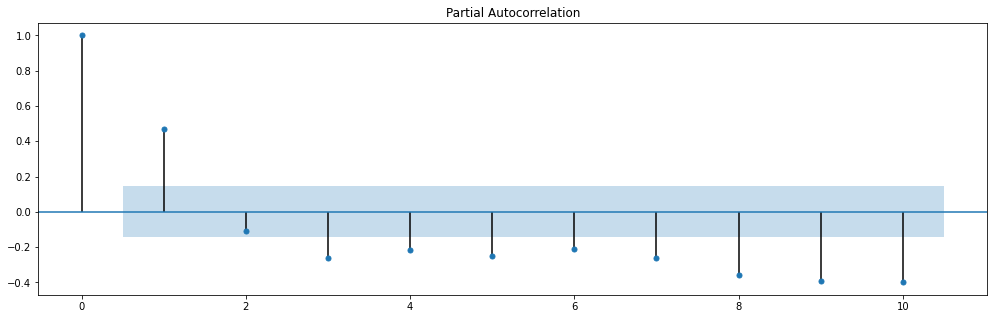

In [27]:
 import statsmodels.api as sm


sm.graphics.tsa.plot_pacf(ic_boxcox_difference, lags=10)
plt.show()

In [31]:
import statsmodels.tsa.arima_model
import  statsmodels.tsa

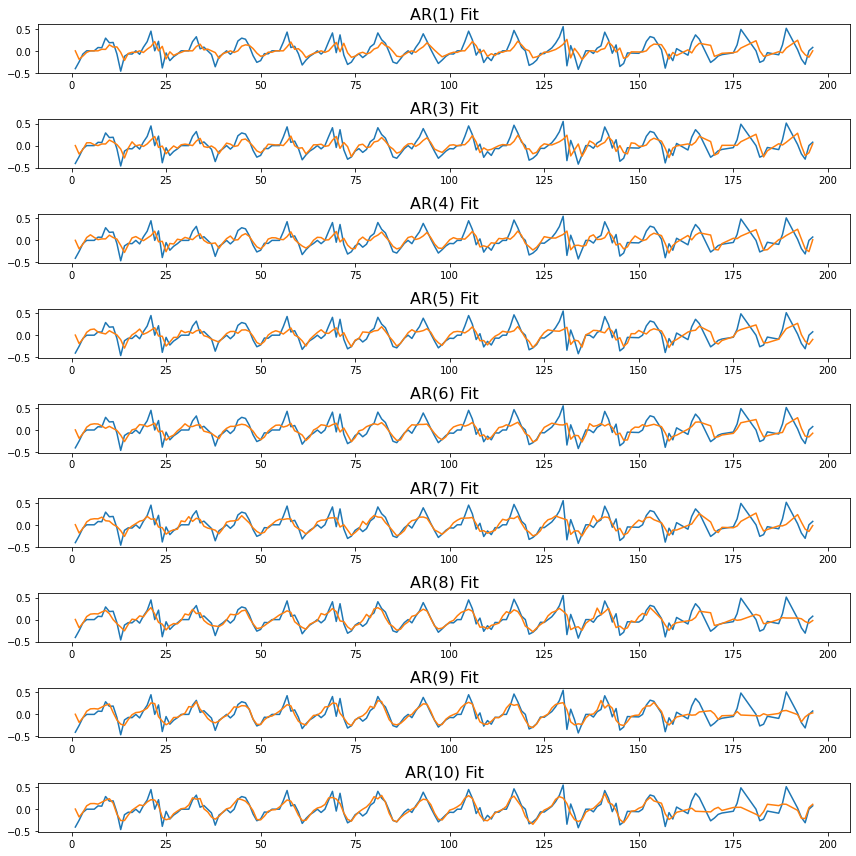

In [32]:
plt.figure(figsize=(12,12))

ar_orders = [1, 3, 4, 5, 6, 7, 8, 9, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARMA(ic_boxcox_difference, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(9,1,idx+1)
    plt.plot(ic_boxcox_difference)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

In [33]:
#AIC comparison
ar_orders = [1, 3, 4, 5, 6, 7, 8, 9, 10]
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): -98.55240548336621
AIC for AR(3): -109.49030973142715
AIC for AR(4): -116.07949425312188
AIC for AR(5): -124.80319813942856
AIC for AR(6): -129.8897884263614
AIC for AR(7): -139.8847592620633
AIC for AR(8): -161.48746545546953
AIC for AR(9): -188.7724984481324
AIC for AR(10): -216.2715393968017


In [34]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): -88.94038542213583
BIC for AR(3): -93.47027629604317
BIC for AR(4): -96.85545413066112
BIC for AR(5): -102.375151329891
BIC for AR(6): -104.25773492974704
BIC for AR(7): -111.04869907837215
BIC for AR(8): -129.44739858470157
BIC for AR(9): -153.52842489028768
BIC for AR(10): -177.82345915188017


In [28]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


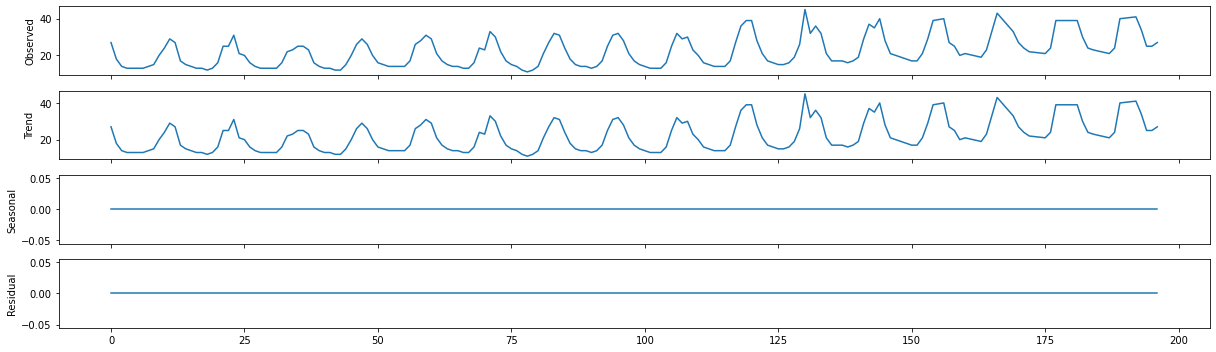

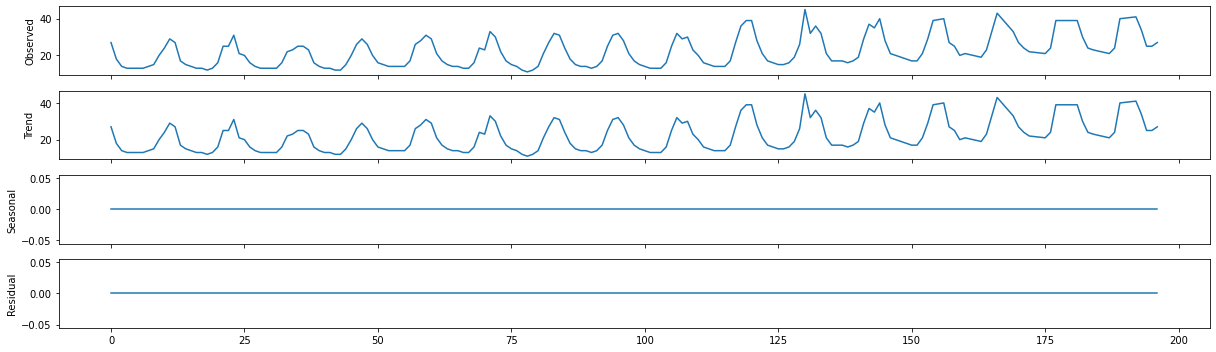

In [48]:
decomposition = seasonal_decompose(IC.heater, freq=1)
decomposition.plot()

In [1]:
#model = ARIMA(IC.heater, order=(3,0,1))
#model_fit = model.fit(disp=0)

## Ice cream

### La série est-elle stationnaire?

In [36]:
result = adfuller(IC['ice cream'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: 0.9415351075245317
n_lags: 13
p-value: 0.9936091216558531
Critial Values:
   1%, -3.469648263987657
Critial Values:
   5%, -2.878798906308495
Critial Values:
   10%, -2.5759713094779593


### Rendre la série stationnaire

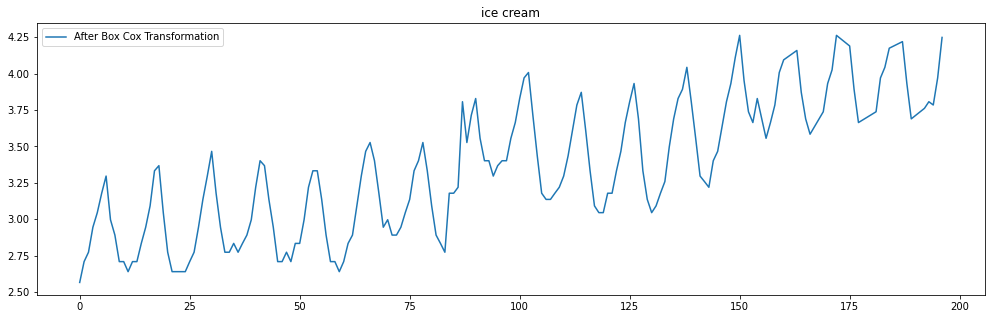

In [37]:
from scipy.stats import boxcox
IC_stat=pd.Series(boxcox(IC['ice cream'],lmbda=0),index=IC.index)
plt.plot(IC_stat, label="After Box Cox Transformation")
plt.legend(loc='best')
plt.title("ice cream")
plt.show()


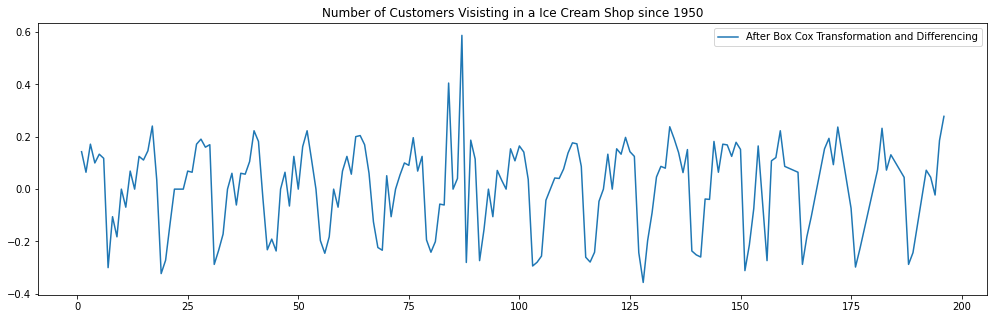

In [38]:
IC_stat_diff= pd.Series(IC_stat-IC_stat.shift(), index=IC_stat.index)
IC_stat_diff.dropna(inplace=True)
plt.plot(IC_stat_diff, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

In [39]:
result = adfuller(IC_stat_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.819832909261901
n_lags: 0.00000000000000000018
p-value: 0.00000000000000000018
Critial Values:
   1%, -3.468952197801766
Critial Values:
   5%, -2.878495056473015
Critial Values:
   10%, -2.57580913601947


#### ice cream

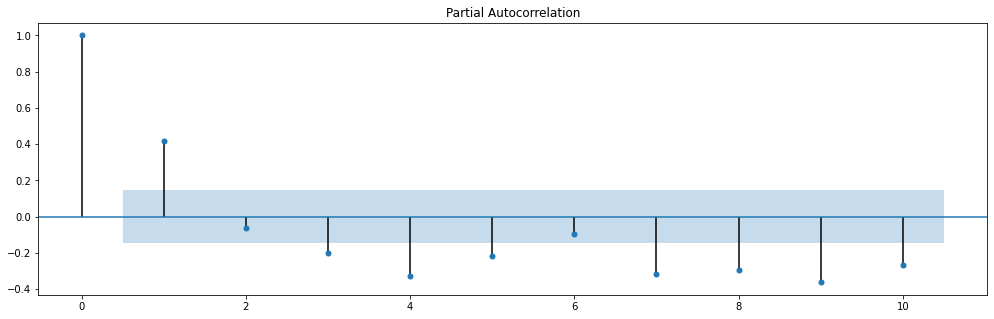

In [40]:
sm.graphics.tsa.plot_pacf(IC_stat_diff, lags=10)
plt.show()

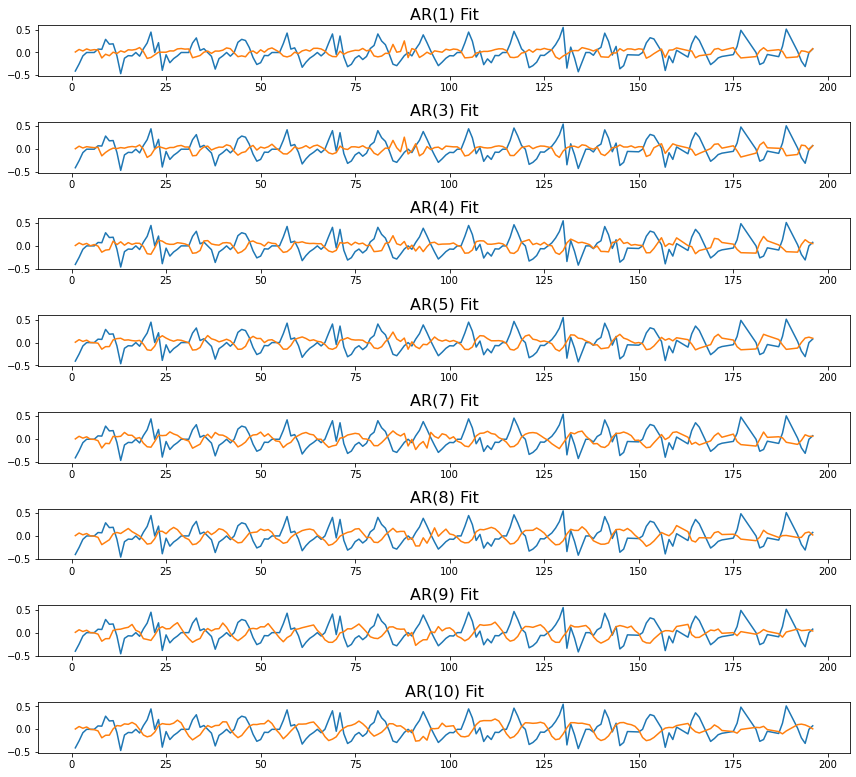

In [41]:
plt.figure(figsize=(12,12))

ar_orders = [1, 3, 4, 5, 7, 8, 9, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARMA(IC_stat_diff, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(9,1,idx+1)
    plt.plot(ic_boxcox_difference)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

In [42]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): -160.87192505174585
AIC for AR(3): -164.79861140833566
AIC for AR(4): -182.1555577786479
AIC for AR(5): -187.9821133142592
AIC for AR(7): -205.49657480394603
AIC for AR(8): -218.51801776587
AIC for AR(9): -238.19377429741598
AIC for AR(10): -246.3425644811823


In [43]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): -151.25990499051545
BIC for AR(3): -148.7785779729517
BIC for AR(4): -162.93151765618714
BIC for AR(5): -165.55406650472165
BIC for AR(7): -176.66051462025487
BIC for AR(8): -186.47795089510205
BIC for AR(9): -202.94970073957126
BIC for AR(10): -207.89448423626078


In [44]:
type(ic_boxcox_difference)

pandas.core.series.Series

In [45]:
type(ar_model)

statsmodels.tsa.arima_model.ARMA

In [54]:
decomposition = seasonal_decompose(IC['ice cream'], freq=1)
decomposition

In [51]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(IC['ice cream'], order=(3,0,1))
model_fit = model.fit(disp=0)

#AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'

In [52]:
model_fit